# Importação das bibliotecas

In [ ]:
import numpy as np # importa a biblioteca para realizar operações com os vetores
import pandas as pd # biblioteca de estrutura de dados tabular
from sklearn.metrics.pairwise import cosine_similarity # biblioteca de similaridade de cosseno
import matplotlib.pyplot as plt # biblioteca gráfica
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Biblioteca para worldcloud
import nltk # Biblioteca de processamento de linguagem natural
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction import text # bib. para converter palavras em matrizes
from transformers import AutoTokenizer, AutoModel
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


# Leitura do arquivo e listagem da feature

In [ ]:
url = "https://raw.githubusercontent.com/penchel/recdeeplearning/main/Jobs/Jobs/jobs.csv"
data = pd.read_csv(url) # lendo o arquivo
data = data.drop("Unnamed: 0",axis=1) # eliminando coluna vazia
print(data.head()) # printar os 5 primeiros documentos de "data"
data.isnull().sum() # sinaliza a existencia de espaços ausentes

feature = data["Key Skills"].tolist() # converte a coluna "Key Skills" para uma lista

                     Job Salary Job Experience Required  \
0   Not Disclosed by Recruiter               5 - 10 yrs   
1   Not Disclosed by Recruiter                2 - 5 yrs   
2   Not Disclosed by Recruiter                0 - 1 yrs   
3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawarehousing   
4                        Programming & Design   

             

# TFIDF

In [ ]:
tfidf = text.TfidfVectorizer( stop_words="english") # instancia um objeto do módulo tfidVectorizer considerando stop words em ingles
tfidf_matrix = tfidf.fit_transform(feature) # transforma a lista feature em uma matriz

# Código de recomendação por similaridade de cosseno

In [ ]:
similarity = cosine_similarity(tfidf_matrix) # Converte a matriz original em uma matriz que armazena cada a similaridade de cada registro por linha em relação aos outros registros

indices = pd.Series(data.index, index=data["Job Title"]).drop_duplicates() # armazena os indices de cada título de trabalho em uma estrutura Series excluindo duplicatas

def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title] #busca o indice numérico baseado no nome do trabalho
    similarity_scores = list(enumerate(similarity[index])) # transforma os valores da linha da matriz de similaridade correspondente ao indice em uma lista
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True) #ordena essa lista
    similarity_scores = similarity_scores[0:5] # filtra essa lista para os valores dos indices de zero a cinco
    newsindices = [i[0] for i in similarity_scores] # filtra para aparecer só os indices
    return data[['Job Title','Key Skills']].iloc[newsindices] # projeta as colunas entre colchetes, filtrando pelos indices

print(jobs_recommendation("Accounts Manager"))
data2 = jobs_recommendation("Accounts Manager")["Key Skills"].tolist()
for skill in data2:
  print(skill)


                              Job Title  \
130              Senior Design Engineer   
129                  Software Developer   
128          Technical Support Engineer   
127  Sales/Business Development Manager   
126                             Trainer   

                                            Key Skills  
130   Senior Design Engineer| Engineering Design| SACS  
129   Javascript| SQL| XML| server| css| technical|...  
128   customer support| support service| field supp...  
127   Sales| Billing| MS Office| Business reporting...  
126   planning| training| training manager| trainer...  
 Senior Design Engineer| Engineering Design| SACS
 Javascript| SQL| XML| server| css| technical| software| developing| HTML| tracking| database| web| Application development| net| programming| Ajax| development| DOM| solid| data integrity| Stored procedures| Reporting tools| application| applications
 customer support| support service| field support| team| management| supervisor| self motivated| 

# Código inicial de redes neurais (Hello, world!)

In [ ]:
import tensorflow as tf
tf.__version__
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential() # cria o modelo sequencial
model.add(tf.keras.layers.Flatten()) # faz o 'flatten', gera os 784 neurônios iniciais, 28 x 28 = 784
model.add(tf.keras.layers.Dense(16,activation=tf.nn.relu)) # adiciona camada com 16 neurônios
model.add(tf.keras.layers.Dense(16,activation=tf.nn.relu)) # adiciona camada com 16 neurônios
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # adiciona camada final com 10 neurônios

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=1) # treina o modelo depois de compilado


Epoch 1/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step - accuracy: 0.8595 - loss: 0.4656
Epoch 2/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - accuracy: 0.9397 - loss: 0.2026
Epoch 3/3
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - accuracy: 0.9472 - loss: 0.1762


Ver a imagem:

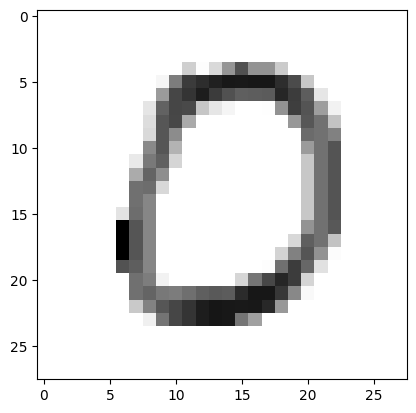

0


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[10], cmap = plt.cm.binary)
plt.show()
print(y_test[10])

In [ ]:
imagem_normalizada = tf.keras.utils.normalize(x_test[10], axis = 1)
imagem_entrada = np.expand_dims(imagem_normalizada, axis=0)
previsao = model.predict(imagem_entrada)
numero = np.argmax(previsao)
print(previsao)
print(numero)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[9.9945003e-01 6.1459379e-11 1.6996839e-04 6.6580733e-06 2.6707649e-09
  1.2992900e-04 1.6939167e-04 2.5021075e-06 6.1114028e-05 1.0537420e-05]]
0


# Recomendador híbrido

In [ ]:
pd.set_option('display.max_colwidth', 20)
movies = pd.read_csv("movies.csv")
rating = pd.read_csv("ratings.csv")
df = movies.merge(rating, how="left", on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animat...,3.0,4.0,9.449194e+08
1,1,Toy Story (1995),Adventure|Animat...,6.0,5.0,8.582755e+08
2,1,Toy Story (1995),Adventure|Animat...,8.0,4.0,8.339819e+08
3,1,Toy Story (1995),Adventure|Animat...,10.0,4.0,9.434979e+08
4,1,Toy Story (1995),Adventure|Animat...,11.0,4.5,1.230859e+09


In [39]:
df["title"].nunique() # encontrar filmes únicos
comment_counts = pd.DataFrame(df["title"].value_counts()).reset_index()
#comment_counts.columns = ["title", "count"]
rare_movies = comment_counts[comment_counts["count"] <= 1000]
# Let's get access to movies with over 1000 reviews:
common_movies = df[~df["title"].isin(rare_movies)]
# Let's create the User Movie Df:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

# There are 3159 movies that 138493 users have voted for.
user_movie_df.head()




<ipython-input-39-b9f337c11e83>:8: PerformanceWarning: The following operation may generate 2404995824 cells in the resulting pandas object.
  user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")


title,"""Great Performances"" Cats (1998)",#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),...,¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Árido Movie (2005),Åsa-Nisse - Wälkom to Knohult (2011),Üvegtigris (2001),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# item-based movie recommendation example:
movie_name = "Matrix, The (1999)"
movie_name = user_movie_df[movie_name]
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)